<a href="https://colab.research.google.com/github/Charly156/Actividad_6_regresion_lineal_multiple_y_no_lineal/blob/main/Actividad_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelos de Regresión No Lineal

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as special
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [ ]:
#Leer archivo
df=pd.read_csv('BD_Socio formador (TrainingDataComplete).csv', index_col='Id')
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


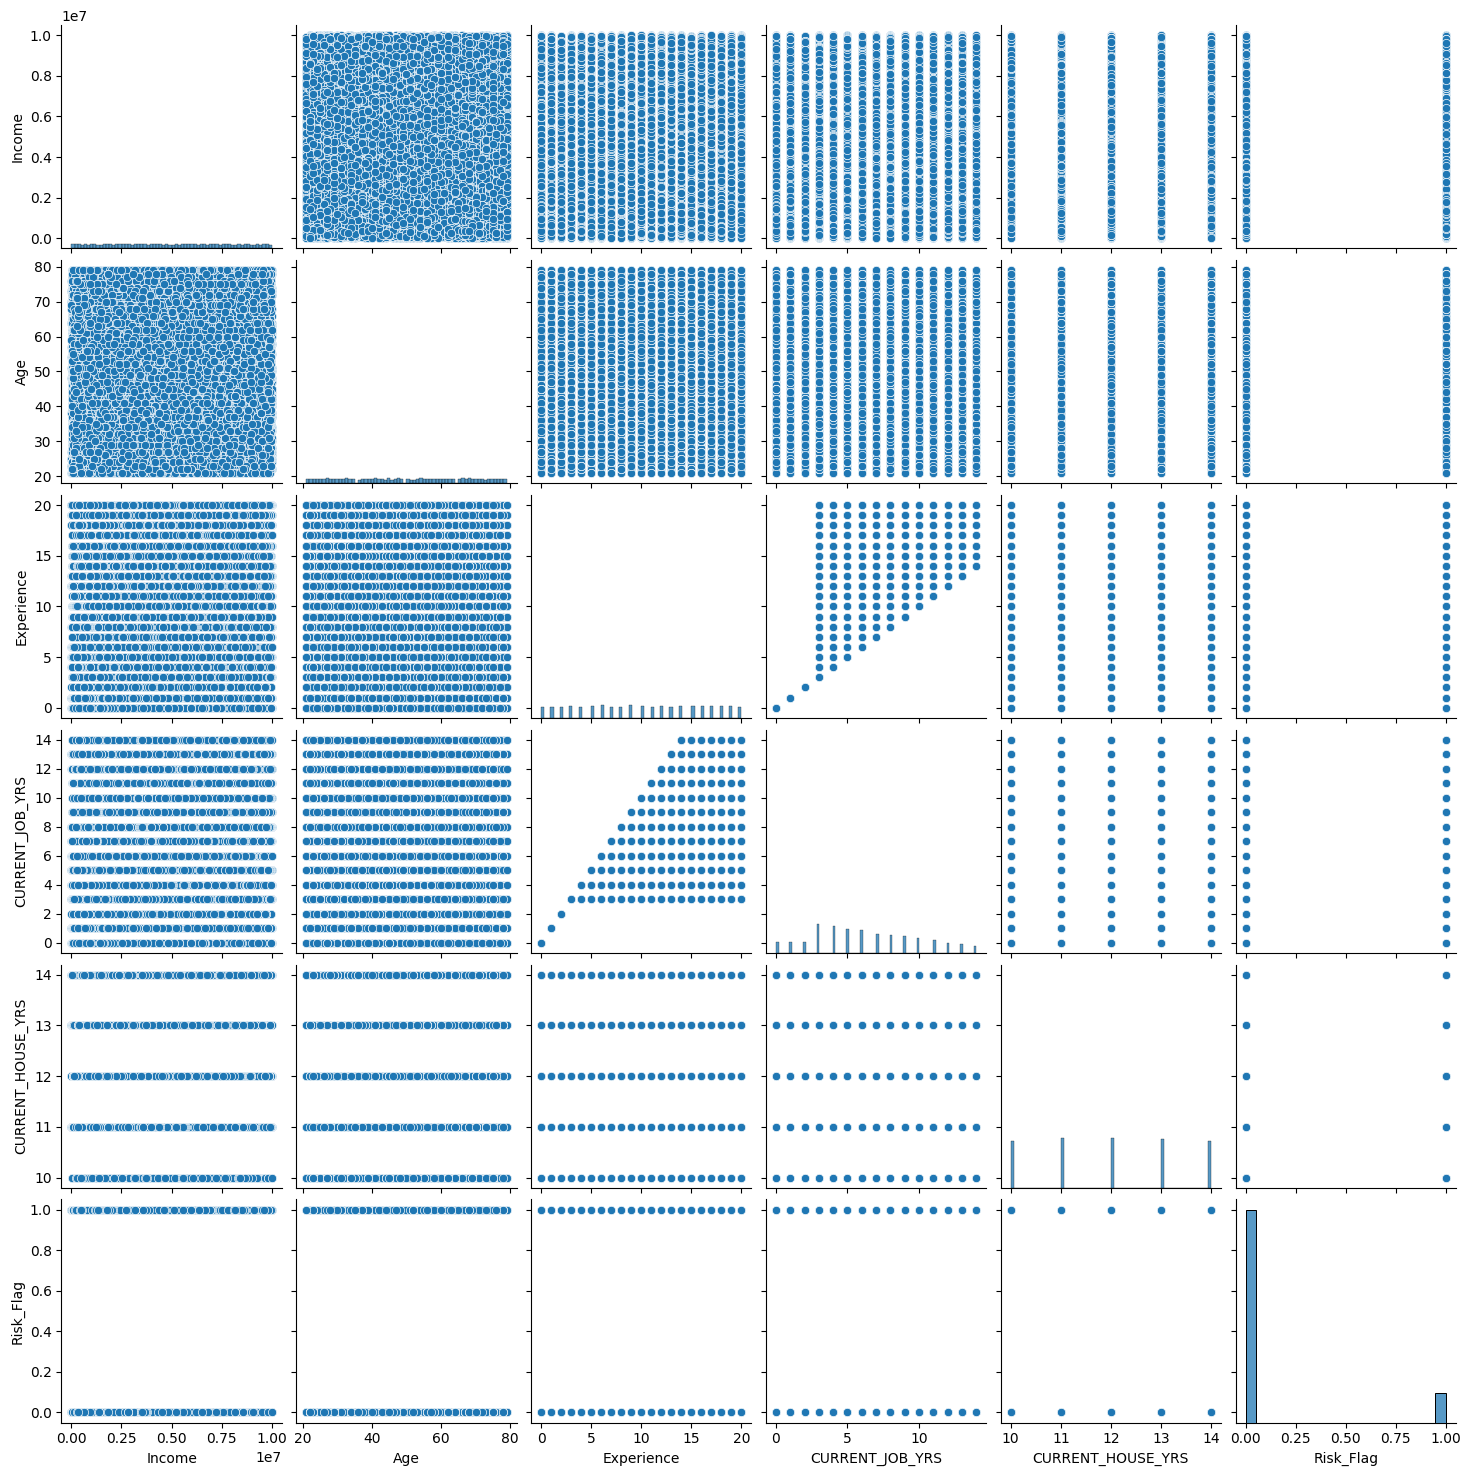

In [ ]:
#Mapas de dispersión de columnas numéricas
sns.pairplot(df)

Modelo no lineal - Income

In [ ]:
#Declarar las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['CURRENT_JOB_YRS']]
Var_Dep= df['Income']

In [ ]:
#Redefinir las variables
x= Vars_Indep
y= Var_Dep

In [ ]:
#Función cociente entre polinomios: y = (a*x**2 + b)/ c*x
def  func_1 (x, a, b, c):
     return (a*x**25 + b)/ c*x

In [ ]:
#Ajustar los parámetros de la función curve_fit
parametros, covs= curve_fit(func_1, df['CURRENT_JOB_YRS'], df['Income'])

In [ ]:
#Obtener los coeficientes del modelo de regresión no lineal
parametros

array([-3.90624749e-13,  1.44215941e+08,  2.43504682e+02])

In [ ]:
#Crear el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func_1, df['CURRENT_JOB_YRS'], df['Income'])
a, b, c = parametros[0], parametros[1], parametros[2]
yfit1 = (a*x**25 + b)/ c*x

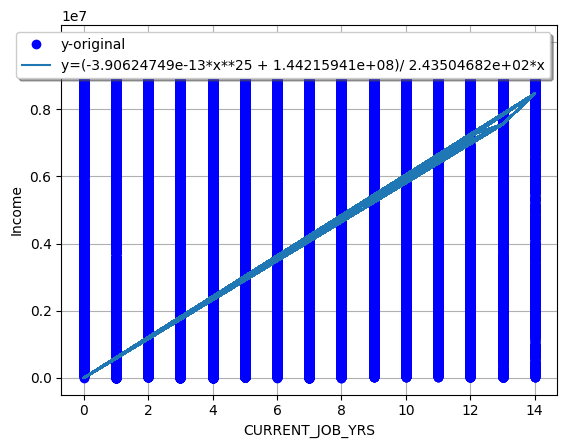

In [ ]:
#Graficar las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=(-3.90624749e-13*x**25 + 1.44215941e+08)/ 2.43504682e+02*x")
plt.xlabel('CURRENT_JOB_YRS')
plt.ylabel('Income')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#determinación
R2_income = r2_score(y, yfit1)
R2_income

-0.7394676112053586

In [ ]:
#correlación
coef_Correl_income=np.sqrt(abs(R2_income))
coef_Correl_income

0.859923026325821

Modelo no lineal - Age

In [ ]:
#Declarar las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['CURRENT_JOB_YRS']]
Var_Dep= df['Age']

In [ ]:
#Redefinir las variables
x= Vars_Indep
y= Var_Dep

In [ ]:
#Función cociente entre polinomios: y = (a*x**2 + b)/ c*x
def  func_2 (x, a, b, c):
     return ((a*x**23 + b)/ c*x)+20

In [ ]:
#Ajustar los parámetros de la función curve_fit
parametros, covs= curve_fit(func_2, df['CURRENT_JOB_YRS'], df['Age'])

In [ ]:
#Obtener los coeficientes del modelo de regresión no lineal
parametros

array([-2.96759219e-16,  4.04202461e+05,  1.13563729e+05])

In [ ]:
#Crear el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func_2, df['CURRENT_JOB_YRS'], df['Age'])
a, b, c = parametros[0], parametros[1], parametros[2]
yfit2 = ((a*x**23 + b)/ c*x)+20

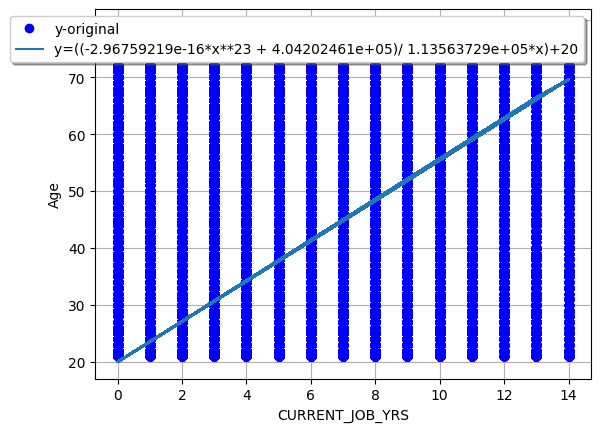

In [ ]:
#Graficar las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="y=((-2.96759219e-16*x**23 + 4.04202461e+05)/ 1.13563729e+05*x)+20")
plt.xlabel('CURRENT_JOB_YRS')
plt.ylabel('Age')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#determinación
R2_age = r2_score(y, yfit2)
R2_age

-0.7639649091525498

In [ ]:
#correlación
coef_Correl=np.sqrt(abs(R2_age))
coef_Correl

0.8740508618796448

Modelo no lineal - Experience

In [ ]:
#Declarar las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['CURRENT_JOB_YRS']]
Var_Dep= df['Experience']

In [ ]:
#Redefinir las variables
x= Vars_Indep
y= Var_Dep

In [ ]:
#1/a*x**2  (Función cuadrática inversa)
#1/a*x**3  (El inverso de una función cúbica)
def  func_3 (x, a):
     return 1/a*x**3

In [ ]:
#Ajustar los parámetros de la función curve_fit
#Sin maxfev=5000 da el siguiente error:
#RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
parametros, covs= curve_fit(func_3, df['CURRENT_JOB_YRS'], df['Experience'],maxfev=5000)

In [ ]:
#Obtener los coeficientes del modelo de regresión no lineal
parametros

array([100.1926319])

In [ ]:
#Crear el modelo de predicción con los parámetros obtenidos
#Sin maxfev=5000 da el siguiente error:
#RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
parametros, _ = curve_fit(func_3, df['CURRENT_JOB_YRS'], df['Experience'],maxfev=5000)
a = parametros[0]
yfit3 = 1/a*x**3

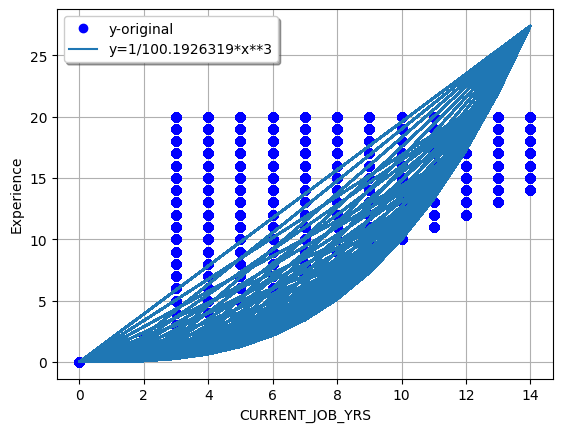

In [ ]:
#Graficar las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit3, label="y=1/100.1926319*x**3")
plt.xlabel('CURRENT_JOB_YRS')
plt.ylabel('Experience')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#determinación
R2_experience = r2_score(y, yfit3)
R2_experience

-0.7869266055055066

In [ ]:
#correlación
coef_Correl=np.sqrt(abs(R2_experience))
coef_Correl

0.8870888374371005

Modelo no lineal - CURRENT_JOB_YRS

In [ ]:
#Declarar las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['Experience']]
Var_Dep= df['CURRENT_JOB_YRS']

In [ ]:
#Redefinir las variables
x= Vars_Indep
y= Var_Dep

In [ ]:
#1/a*x**2  (Función cuadrática inversa)
#1/a*x**3  (El inverso de una función cúbica)
def  func_4 (x, a):
     return 1/a*x**3

In [ ]:
#Ajustar los parámetros de la función curve_fit
parametros, covs= curve_fit(func_4, df['Experience'], df['CURRENT_JOB_YRS'])

In [ ]:
#Obtener los coeficientes del modelo de regresión no lineal
parametros

array([590.96959941])

In [ ]:
#Crear el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func_4, df['Experience'], df['CURRENT_JOB_YRS'])
a = parametros[0]
yfit4 = 1/a*x**3

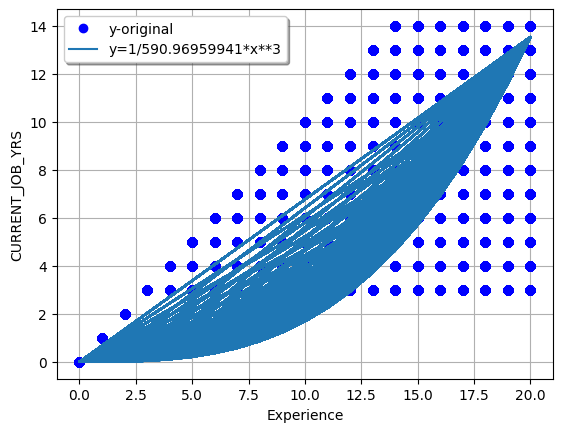

In [ ]:
#Graficar las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit4, label="y=1/590.96959941*x**3")
plt.xlabel('Experience')
plt.ylabel('CURRENT_JOB_YRS')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#determinación
R2_CJY = r2_score(y, yfit4)
R2_CJY

-0.7965877405972979

In [ ]:
#correlación
coef_Correl=np.sqrt(abs(R2_CJY))
coef_Correl

0.8925176416168467

Modelo no lineal - CURRENT_HOUSE_YRS

In [ ]:
#Declarar las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['Age']]
Var_Dep= df['CURRENT_HOUSE_YRS']

In [ ]:
#Redefinir las variables
x= Vars_Indep
y= Var_Dep

In [ ]:
#Función cociente entre polinomios: y = (a*x**2 + b)/ c*x
def  func_5 (x, a, b, c):
     return ((a*x**2 + b)/ c*x)+2.9

In [ ]:
#Ajustar los parámetros de la función curve_fit
#Sin maxfev=5000 da el siguiente error:
#RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.
parametros, covs= curve_fit(func_5, df['Age'], df['CURRENT_HOUSE_YRS'],maxfev=5000)

In [ ]:
#Obtener los coeficientes del modelo de regresión no lineal
parametros

array([-2.84987587e-04,  2.59113350e+00,  9.16644330e+00])

In [ ]:
#Crear el modelo de predicción con los parámetros obtenidos
#Sin maxfev=5000 da el siguiente error:
#RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.
parametros, _ = curve_fit(func_5, df['Age'], df['CURRENT_HOUSE_YRS'],maxfev=5000)
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit5 = ((a*x**2 + b)/ c*x)+2.9

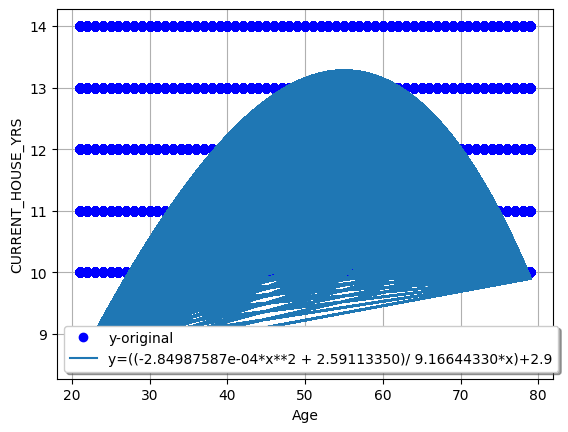

In [ ]:
#Graficar las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit5, label="y=((-2.84987587e-04*x**2 + 2.59113350)/ 9.16644330*x)+2.9")
plt.xlabel('Age')
plt.ylabel('CURRENT_HOUSE_YRS')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#determinación
R2_CHY = r2_score(y, yfit5)
R2_CHY

-0.9845719722286639

In [ ]:
#correlación
coef_Correl=np.sqrt(abs(R2_CHY))
coef_Correl

0.9922560013568393

In [ ]:
#Tabla de comparación para este modelo
#Sí tiene sentido que los coeficientes sean tan altos porque la diferencia (aka error) es baja
df.insert(11,'CHY_predictions',yfit5)
diferencias=df['CURRENT_HOUSE_YRS']-df['CHY_predictions']
df.insert(12,'CHY_diff',diferencias)
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,CHY_predictions,CHY_diff,Risk_Flag
Id,,,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,9.023272,3.976728,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,12.217260,0.782740,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,12.618275,-2.618275,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,12.346940,-0.346940,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,12.957882,1.042118,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,12.583170,-1.583170,0
251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,9.703133,1.296867,0
251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,12.876889,-0.876889,0


In [ ]:
#Error promedio
df['CHY_diff'].mean()

0.2084011985072095

Modelo no lineal - Risk_Flag

In [ ]:
#Declarar las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['Age']]
Var_Dep= df['Risk_Flag']

In [ ]:
#Redefinir las variables
x= Vars_Indep
y= Var_Dep

In [ ]:
#Reflejo de una función cuadrática inversa
def  func_6 (x, a):
     return -((1/a*x**2)**79)

In [ ]:
#Ajustar los parámetros de la función curve_fit
#Sin maxfev=5000 da el siguiente error:
#RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 400.
parametros, covs= curve_fit(func_6, df['Age'], df['Risk_Flag'],maxfev=5000)

In [ ]:
#Obtener los coeficientes del modelo de regresión no lineal
parametros

array([6493.7689155])

In [ ]:
#Crear el modelo de predicción con los parámetros obtenidos
#Sin maxfev=5000 da el siguiente error:
#RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 400.
parametros, _ = curve_fit(func_6, df['Age'], df['Risk_Flag'],maxfev=5000)
a = parametros[ 0 ]
yfit6 = -((1/a*x**2)**79)

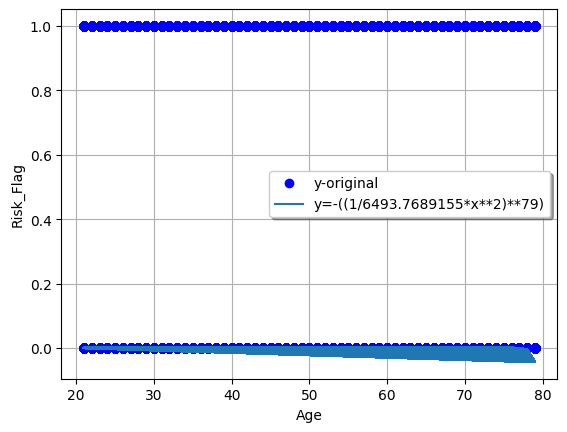

In [ ]:
#Graficar las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit6, label="y=-((1/6493.7689155*x**2)**79)")
plt.xlabel('Age')
plt.ylabel('Risk_Flag')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#determinación
R2_RF = r2_score(y, yfit6)
R2_RF

-0.14246963987879235

In [ ]:
#correlación
coef_Correl=np.sqrt(abs(R2_RF))
coef_Correl

0.3774515066585274

#Heatmap final

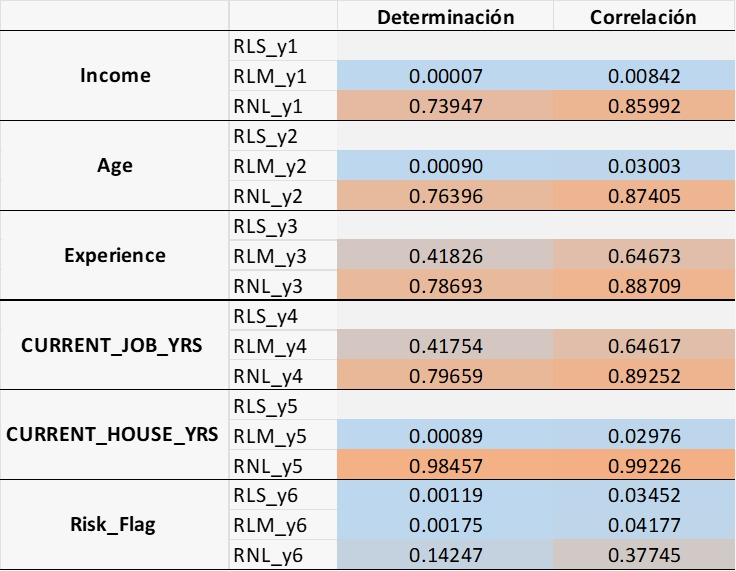